<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/1_PROYECTO_FINAL/Demo_Watershed_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
from google.colab.patches import cv2_imshow

Aquí se carga la imagen en color

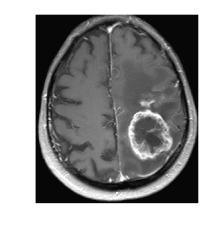

In [4]:
img_color = cv2.imread('/content/brain.png', 1) # 1 = color
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Se convierte a escala de grises utilizando la función `cvtColor()` de OpenCV.

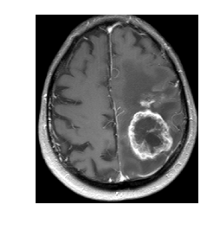

In [5]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

Aquí se aplica la binarización de Otsu a la imagen en escala de grises utilizando la función `threshold()` de OpenCV.

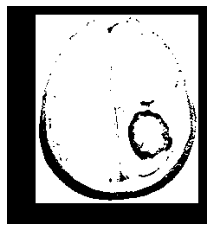

In [6]:
# Otsu's binarization
#new_img = 255 - img_gray # Invert colors, to have a black background and object of interest in white
ret, thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

Aquí se aplica la operación morfológica de apertura a la imagen binaria utilizando la función `morphologyEx()` de OpenCV.

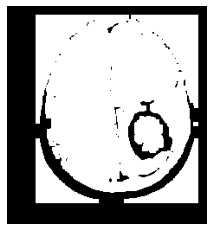

In [7]:
# noise removal. morphological opening
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.show()

Aquí se dilata la imagen binaria para obtener la región de Fondo Seguro, utilizando la función `dilate()` de OpenCV.

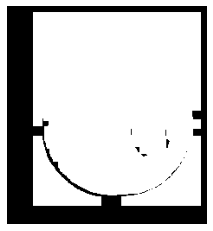

In [8]:
# sure background area
# Dilation increases object boundary to background.
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg, cmap='gray')
plt.axis('off')
plt.show()

Aquí se utiliza la transformada de distancia para obtener la región de Primer plano Seguro. Además, se aplica un umbral para obtener los píxeles con valores altos de distancia.

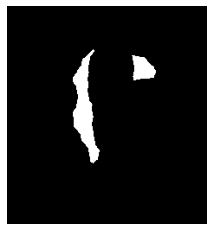

In [9]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg, cmap='gray')
plt.axis('off')
plt.show()

Aquí se obtiene la región desconocida restando la región de fondo y la región de primer plano.

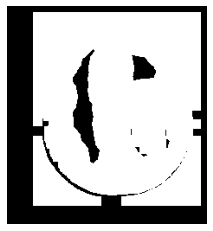

In [10]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown, cmap='gray')
plt.axis('off')
plt.show()

Aquí se utilizan los marcadores obtenidos a partir de la transformada de distancia para aplicar el algoritmo Watershed. La función `connectedComponents()` de OpenCV se utiliza para asignar un valor de etiqueta a cada píxel de la imagen. Luego se suman 1 a los valores de etiqueta y se establecen los valores de los píxeles desconocidos a 0. 

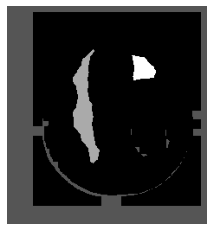

In [11]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

Finalmente, se aplica el algoritmo Watershed utilizando la función `watershed()` de OpenCV. Y se dibujan los contornos de los objetos detectados en la imagen original, estableciendo en rojo los bordes segmentados.

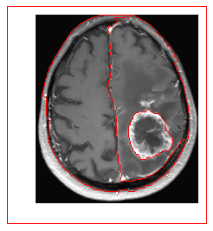

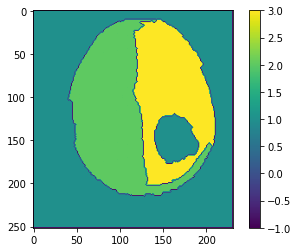

In [ ]:
# Apply watershed. Then marker image will be modified. The boundary region will be marked with -1.
markers = cv2.watershed(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB),markers)
img_color[markers == -1] = [255,0,0]

plt.imshow(img_color, cmap='gray')
plt.axis('off')
plt.show()

imgplt = plt.imshow(markers)
plt.colorbar()
plt.show()

En resumen, se aplica el algoritmo Watershed a una imagen en color utilizando la transformada de distancia para detectar las regiones de primer plano y de fondo. El resultado final es una imagen en color donde se destacan los bordes segmentados.

# Referencias

* Abhirami, Dhanya. (2018). *Brain Tumour Detection using MRI Image*. Fecha de consulta: 6 de marzo de 2023, de Github Sitio web: https://github.com/Dhanya-Abhirami/Brain-Tumour-Segmentation/blob/master/Brain%20Tumour%20Detection%20using%20MRI%20Image.ipynb
* OpenCV. (s.f.). Image Segmentation with Watershed Algorithm. Fecha de consulta: 6 de marzo de 2023, de OpenCV Sitio web> https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html